# Mean Shift

## Reading dataset

In [1]:
from assignment_3.clustering.io import read_small_dataset
from assignment_3.clustering.model import MeanShiftEvaluation, DataClusterSplit

In [2]:
data = read_small_dataset().reduce_to_percentage(0.1)
data

2023-02-22 16:34:19.168 | INFO     | assignment_3.clustering.io:read_small_dataset:50 - Reading datasets


[Features: 784; Length: 1050]

In [3]:
X, y = data

## Construct iteration

In [4]:
mean_shift_evaluation = MeanShiftEvaluation(
    data=data,
    n_components=[2, 5, 10, 20, 30, 50, 100, 130, 170, 200],
    kernels=[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75]
)

In [5]:
%%time
mean_shift_evaluation.evaluate()

Processing kernel size: 0.01
  > Processed number of component: 2 [0.70423 s] 
  > Processed number of component: 5 [0.54411 s] 
  > Processed number of component: 10 [0.56273 s] 
  > Processed number of component: 20 [0.57815 s] 
  > Processed number of component: 30 [0.61604 s] 
  > Processed number of component: 50 [0.70111 s] 
  > Processed number of component: 100 [0.83822 s] 
  > Processed number of component: 130 [1.37140 s] 
  > Processed number of component: 170 [1.77133 s] 
  > Processed number of component: 200 [1.41371 s] 
Processing kernel size: 0.05
  > Processed number of component: 2 [1.98885 s] 
  > Processed number of component: 5 [0.73262 s] 
  > Processed number of component: 10 [0.68157 s] 
  > Processed number of component: 20 [0.85896 s] 
  > Processed number of component: 30 [1.01329 s] 
  > Processed number of component: 50 [1.42233 s] 
  > Processed number of component: 100 [1.31744 s] 
  > Processed number of component: 130 [1.40126 s] 
  > Processed number o

In [6]:
mean_shift_evaluation.results

{0.01: {2: {'score': 0.8997939080303237, 'n_clusters': 705, 'time': 0.7042272},
  5: {'score': 0.8999246447864179,
   'n_clusters': 1050,
   'time': 0.5441143999999998},
  10: {'score': 0.8999246447864179, 'n_clusters': 1050, 'time': 0.562735},
  20: {'score': 0.8999246447864179,
   'n_clusters': 1050,
   'time': 0.5781463999999996},
  30: {'score': 0.8999246447864179,
   'n_clusters': 1050,
   'time': 0.6160376999999997},
  50: {'score': 0.8999246447864179, 'n_clusters': 1050, 'time': 0.7011078},
  100: {'score': 0.8999246447864179,
   'n_clusters': 1050,
   'time': 0.8382222000000006},
  130: {'score': 0.8999246447864179,
   'n_clusters': 1050,
   'time': 1.3713967999999994},
  170: {'score': 0.8999246447864179,
   'n_clusters': 1050,
   'time': 1.7713295000000002},
  200: {'score': 0.8999246447864179, 'n_clusters': 1050, 'time': 1.4137141}},
 0.05: {2: {'score': 0.8936855962594762,
   'n_clusters': 84,
   'time': 1.9888522999999996},
  5: {'score': 0.900304144536747,
   'n_clusters'

In [7]:
mean_shift_evaluation.best_model

[N-rows: 1050; N-components: 20; KernelSize: 0.5, Score: 0.9055753779109356, N-clusters: 319]

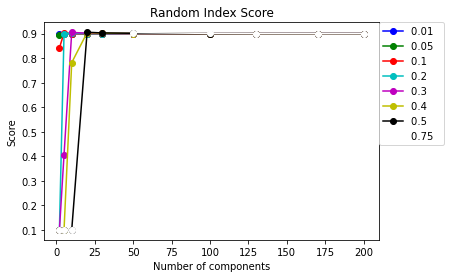

In [8]:
mean_shift_evaluation.plot_score()

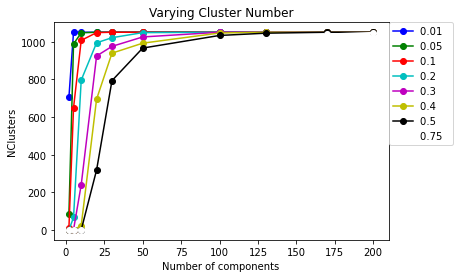

In [9]:
mean_shift_evaluation.plot_n_clusters()

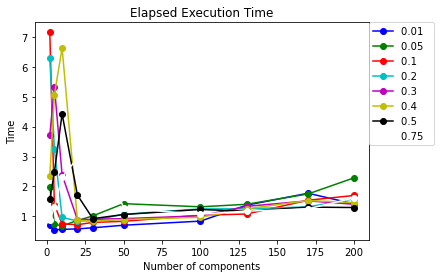

In [10]:
mean_shift_evaluation.plot_time()

## Best model

In [11]:
best = mean_shift_evaluation.best_model

In [12]:
best

[N-rows: 1050; N-components: 20; KernelSize: 0.5, Score: 0.9055753779109356, N-clusters: 319]

In [13]:
clusters = DataClusterSplit(data=data, index=best.out)

In [14]:
clusters

Cluster Data Split [Data: 1050, Clusters: 319, Mean-per-Cluster: 3.29153605015674] 

In [15]:
clusters.clusters_frequencies

{59: 1,
 63: 1,
 47: 1,
 25: 1,
 36: 1,
 39: 1,
 29: 1,
 31: 1,
 27: 1,
 15: 2,
 16: 1,
 19: 1,
 14: 1,
 10: 2,
 13: 3,
 9: 1,
 8: 5,
 7: 4,
 6: 7,
 11: 1,
 5: 8,
 4: 6,
 3: 22,
 2: 50,
 1: 196}

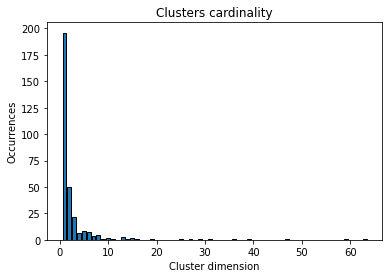

In [16]:
clusters.frequencies_histo()

In [17]:
clusters_best = clusters.get_sub_clusters(a=5)

In [18]:
clusters_best

Cluster Data Split [Data: 664, Clusters: 45, Mean-per-Cluster: 14.755555555555556] 

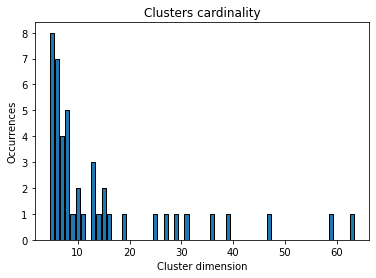

In [19]:
clusters_best.frequencies_histo()

[Mode 1: {1: 56, 2: 2, 7: 1}] 


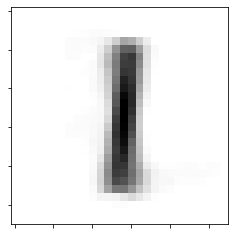

[Mode 9: {7: 20, 4: 10, 9: 32, 2: 1}] 


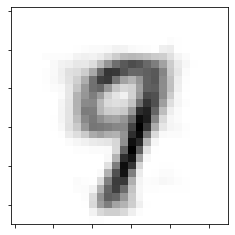

[Mode 1: {1: 43, 2: 1, 4: 1, 5: 2}] 


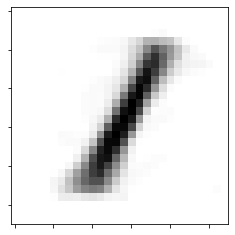

[Mode 6: {6: 24, 5: 1}] 


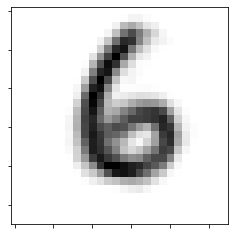

[Mode 3: {2: 1, 3: 25, 5: 2, 8: 7, 1: 1}] 


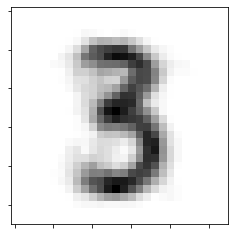

[Mode 9: {9: 22, 4: 15, 7: 2}] 


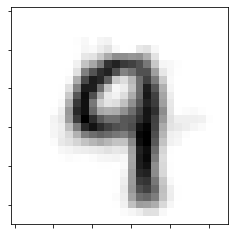

[Mode 7: {9: 9, 7: 20}] 


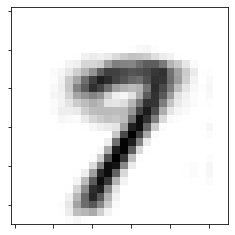

[Mode 6: {6: 28, 4: 1, 5: 2}] 


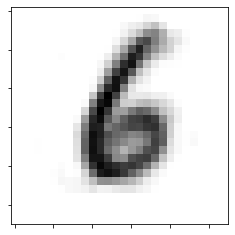

[Mode 9: {4: 11, 9: 12, 6: 1, 7: 1, 5: 2}] 


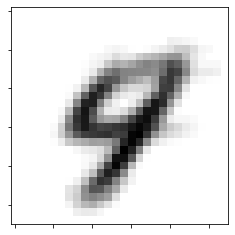

[Mode 0: {0: 15}] 


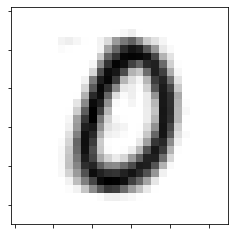

[Mode 8: {8: 15, 2: 1}] 


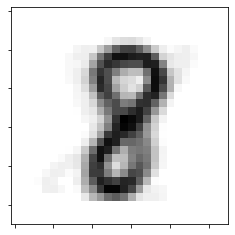

[Mode 7: {7: 18, 9: 1}] 


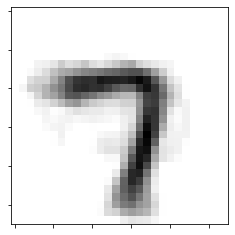

[Mode 8: {5: 2, 8: 6, 9: 1, 2: 1, 4: 4}] 


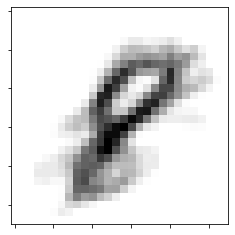

[Mode 0: {0: 10}] 


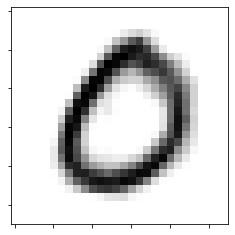

[Mode 3: {3: 12, 5: 3}] 


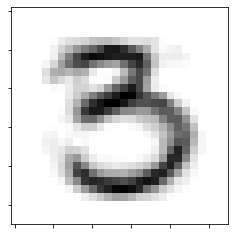

[Mode 2: {2: 13}] 


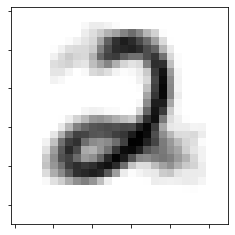

[Mode 5: {0: 1, 5: 12}] 


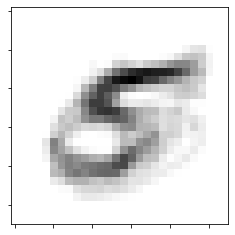

[Mode 3: {3: 10}] 


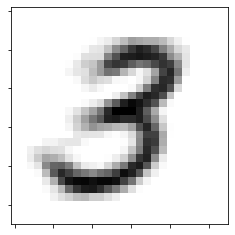

[Mode 5: {5: 8, 6: 1}] 


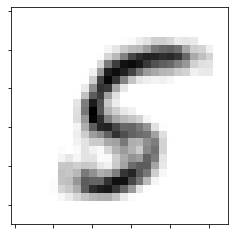

[Mode 6: {6: 8}] 


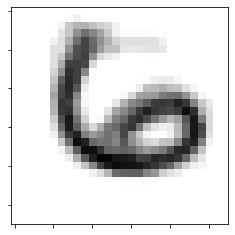

[Mode 2: {2: 13}] 


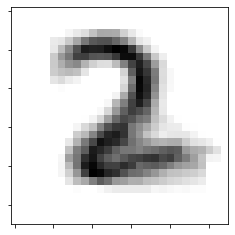

[Mode 0: {0: 8}] 


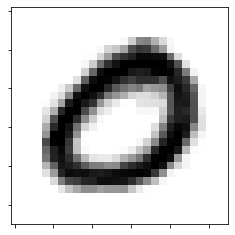

[Mode 0: {0: 7}] 


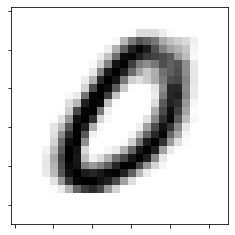

[Mode 2: {2: 6}] 


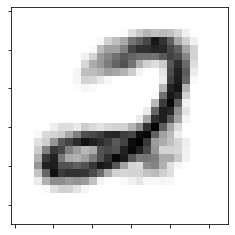

[Mode 0: {0: 8}] 


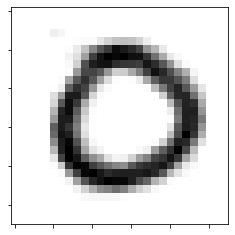

[Mode 0: {0: 6}] 


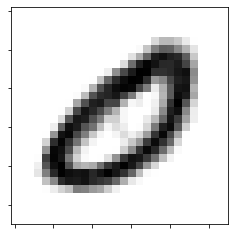

[Mode 6: {6: 8}] 


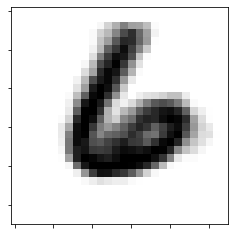

[Mode 6: {6: 7}] 


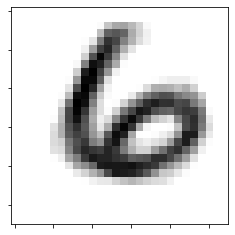

[Mode 2: {2: 6}] 


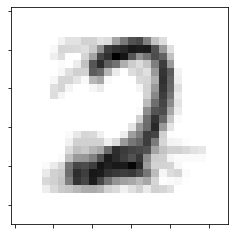

[Mode 8: {8: 6}] 


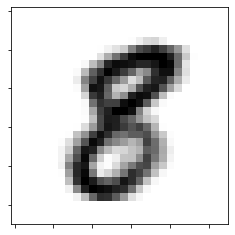

[Mode 6: {4: 1, 6: 9, 9: 1}] 


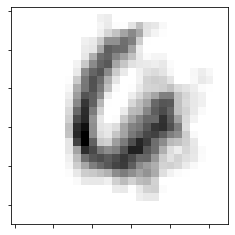

[Mode 2: {2: 6, 7: 1}] 


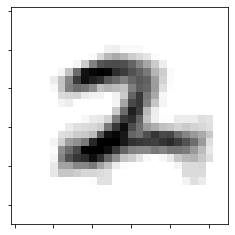

[Mode 0: {0: 5}] 


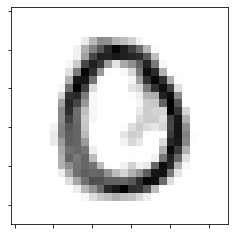

[Mode 7: {7: 5}] 


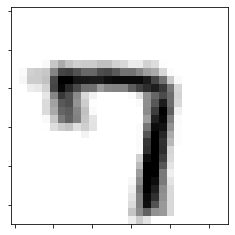

[Mode 3: {3: 6}] 


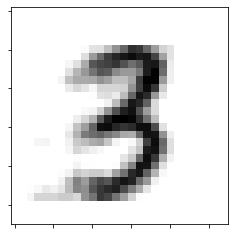

[Mode 6: {6: 6}] 


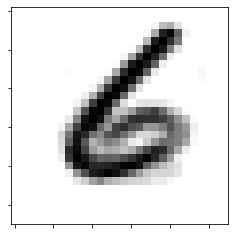

[Mode 2: {2: 5}] 


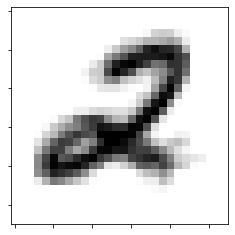

[Mode 5: {5: 5}] 


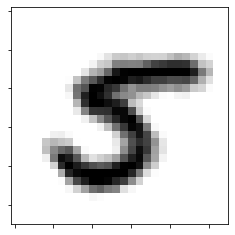

[Mode 4: {9: 1, 4: 7}] 


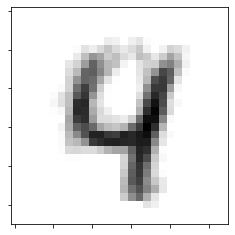

[Mode 3: {3: 3, 9: 2}] 


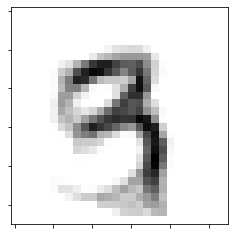

[Mode 8: {8: 5}] 


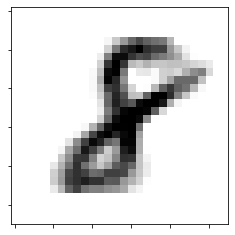

[Mode 3: {3: 6}] 


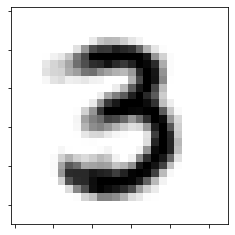

[Mode 7: {9: 1, 7: 2, 4: 2}] 


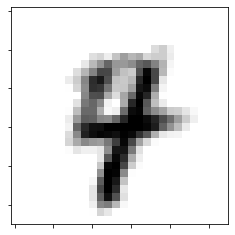

[Mode 9: {7: 1, 9: 5, 4: 1}] 


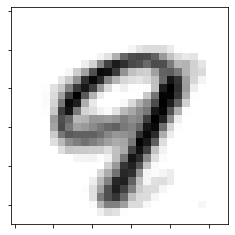

[Mode 7: {7: 5}] 


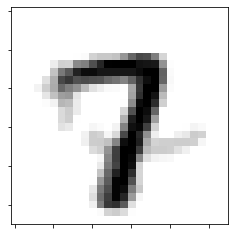

In [20]:
clusters_best.plot_mean_digit()

In [21]:
clusters_bad = clusters.get_sub_clusters(b=1)

In [22]:
clusters_bad

Cluster Data Split [Data: 196, Clusters: 196, Mean-per-Cluster: 1] 

[Mode 0: {0: 1}] 


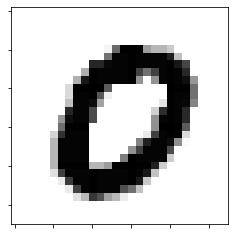

[Mode 0: {0: 1}] 


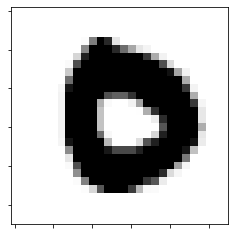

[Mode 0: {0: 1}] 


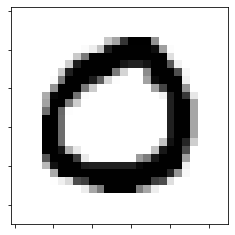

[Mode 0: {0: 1}] 


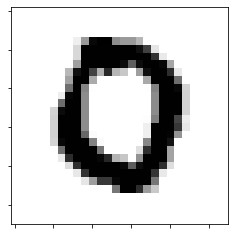

[Mode 0: {0: 1}] 


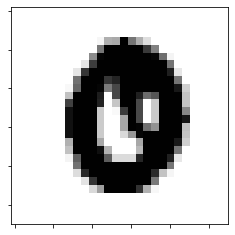

[Mode 0: {0: 1}] 


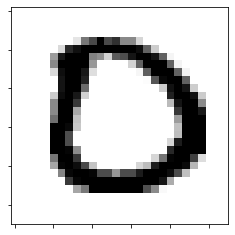

[Mode 5: {5: 1}] 


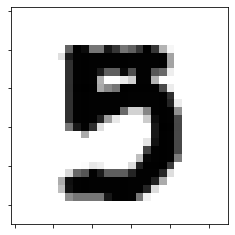

[Mode 0: {0: 1}] 


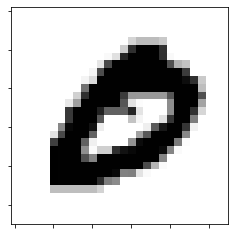

[Mode 8: {8: 1}] 


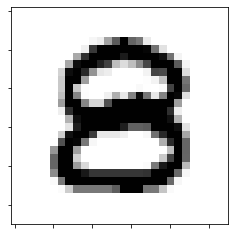

[Mode 4: {4: 1}] 


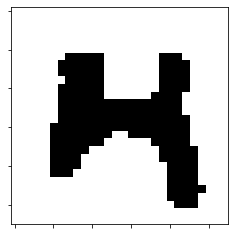

[Mode 8: {8: 1}] 


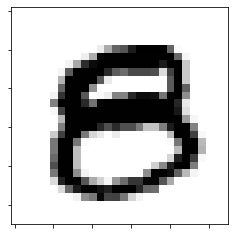

[Mode 0: {0: 1}] 


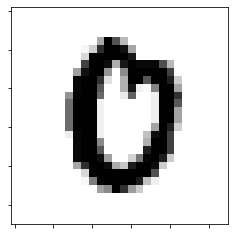

[Mode 9: {9: 1}] 


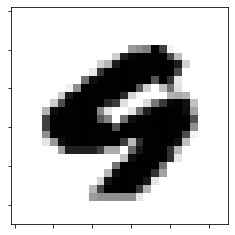

[Mode 5: {5: 1}] 


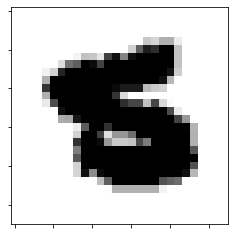

[Mode 3: {3: 1}] 


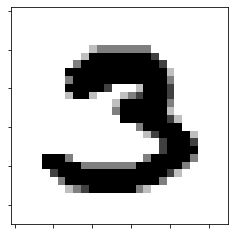

[Mode 2: {2: 1}] 


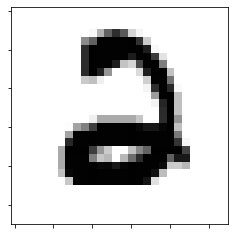

[Mode 3: {3: 1}] 


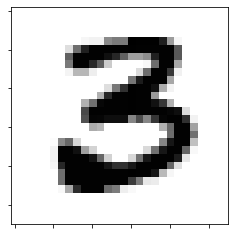

[Mode 3: {3: 1}] 


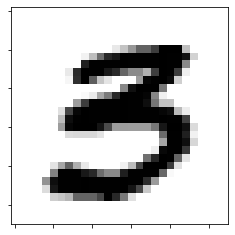

[Mode 0: {0: 1}] 


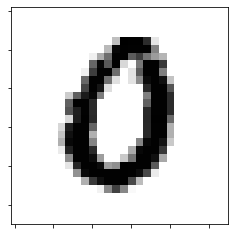

[Mode 0: {0: 1}] 


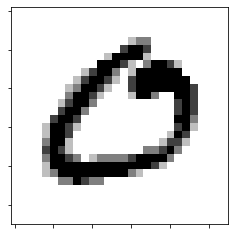

[Mode 2: {2: 1}] 


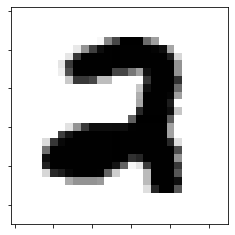

[Mode 2: {2: 1}] 


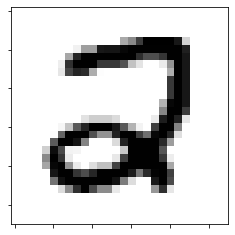

[Mode 2: {2: 1}] 


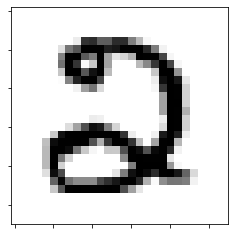

[Mode 2: {2: 1}] 


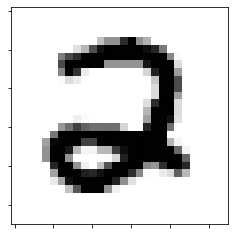

[Mode 8: {8: 1}] 


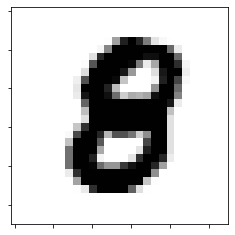

[Mode 5: {5: 1}] 


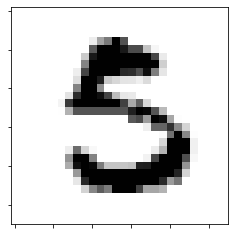

[Mode 8: {8: 1}] 


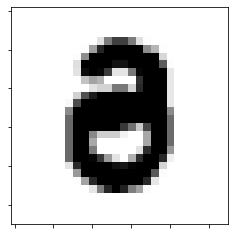

[Mode 3: {3: 1}] 


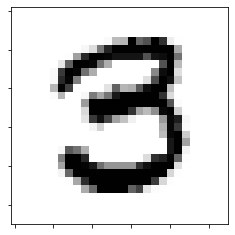

[Mode 2: {2: 1}] 


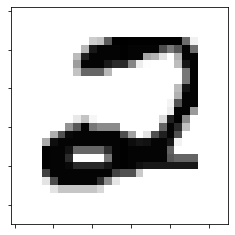

[Mode 2: {2: 1}] 


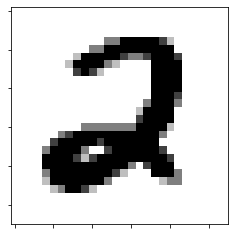

[Mode 2: {2: 1}] 


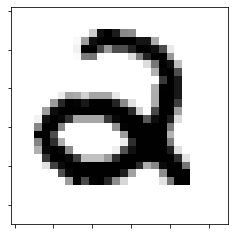

[Mode 5: {5: 1}] 


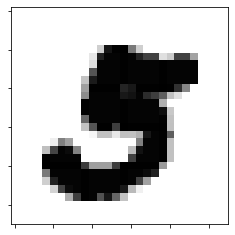

[Mode 5: {5: 1}] 


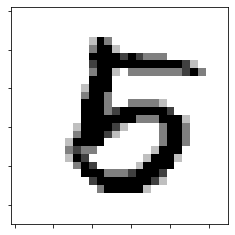

[Mode 5: {5: 1}] 


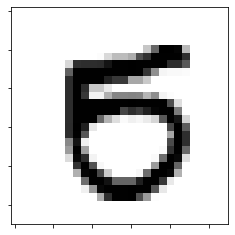

[Mode 3: {3: 1}] 


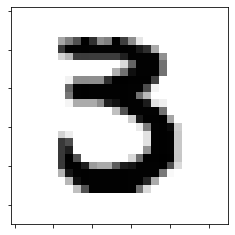

[Mode 3: {3: 1}] 


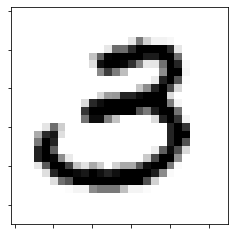

[Mode 8: {8: 1}] 


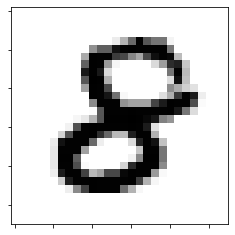

[Mode 4: {4: 1}] 


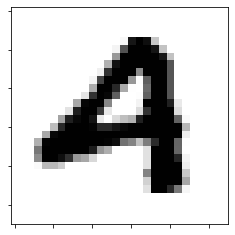

[Mode 5: {5: 1}] 


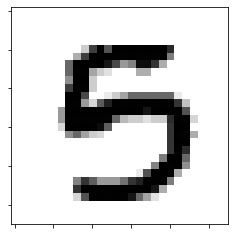

[Mode 5: {5: 1}] 


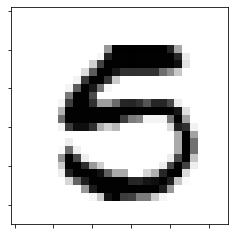

[Mode 6: {6: 1}] 


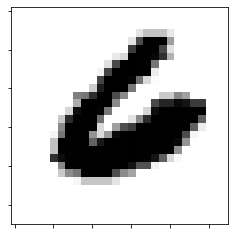

[Mode 3: {3: 1}] 


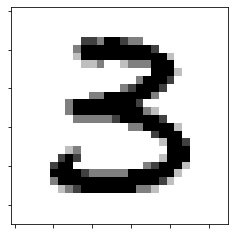

[Mode 2: {2: 1}] 


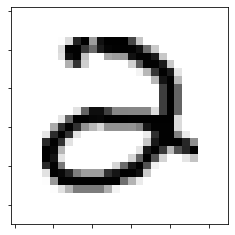

[Mode 8: {8: 1}] 


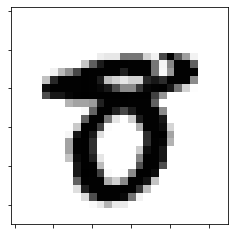

[Mode 6: {6: 1}] 


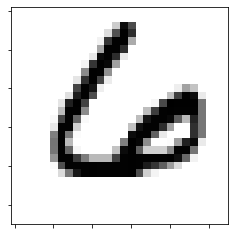

[Mode 8: {8: 1}] 


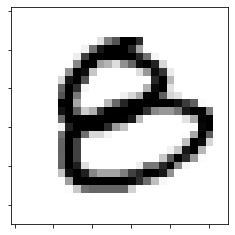

[Mode 2: {2: 1}] 


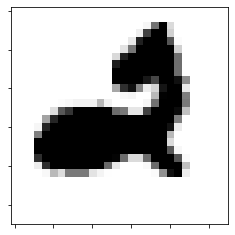

[Mode 8: {8: 1}] 


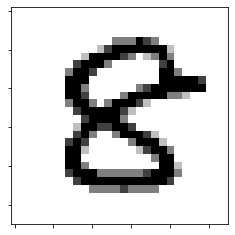

[Mode 3: {3: 1}] 


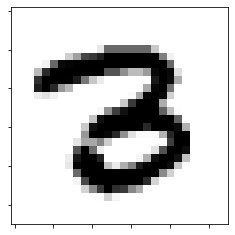

[Mode 0: {0: 1}] 


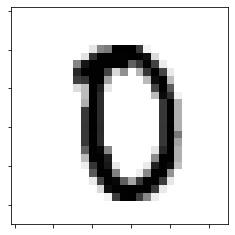

[Mode 3: {3: 1}] 


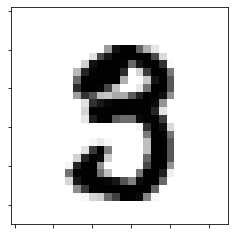

[Mode 3: {3: 1}] 


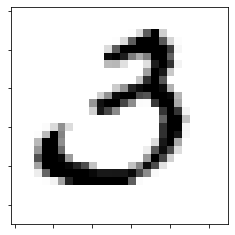

[Mode 2: {2: 1}] 


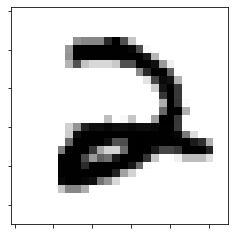

[Mode 5: {5: 1}] 


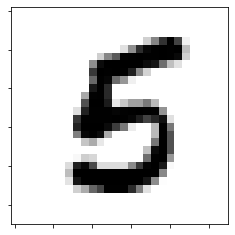

[Mode 3: {3: 1}] 


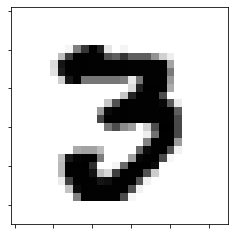

[Mode 3: {3: 1}] 


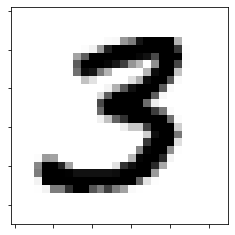

[Mode 8: {8: 1}] 


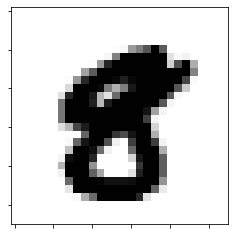

[Mode 0: {0: 1}] 


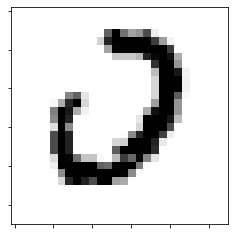

[Mode 2: {2: 1}] 


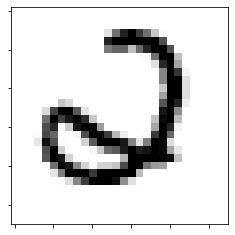

[Mode 6: {6: 1}] 


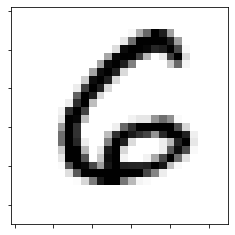

[Mode 4: {4: 1}] 


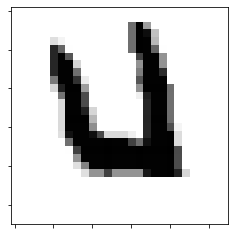

[Mode 8: {8: 1}] 


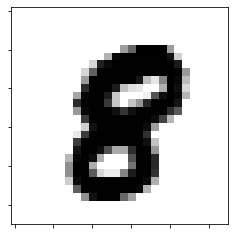

[Mode 2: {2: 1}] 


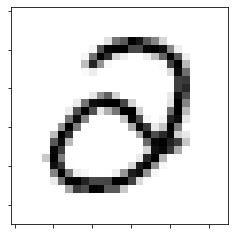

[Mode 5: {5: 1}] 


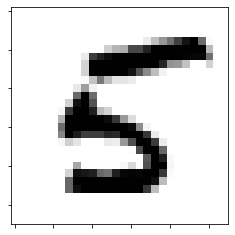

[Mode 8: {8: 1}] 


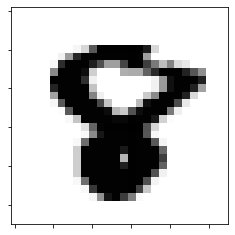

[Mode 4: {4: 1}] 


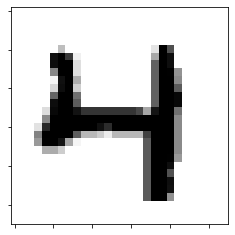

[Mode 6: {6: 1}] 


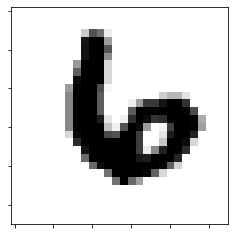

[Mode 3: {3: 1}] 


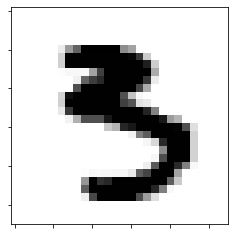

[Mode 2: {2: 1}] 


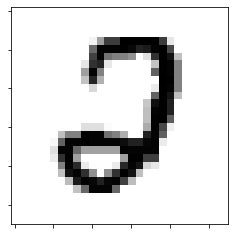

[Mode 0: {0: 1}] 


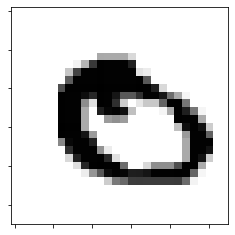

[Mode 5: {5: 1}] 


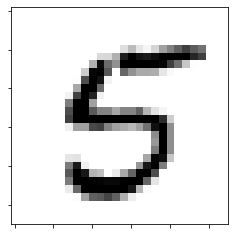

[Mode 5: {5: 1}] 


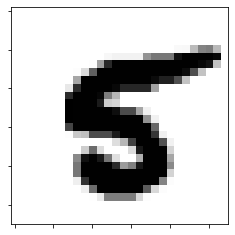

[Mode 0: {0: 1}] 


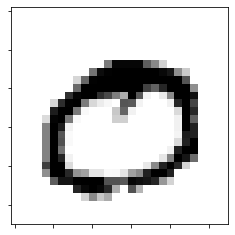

[Mode 6: {6: 1}] 


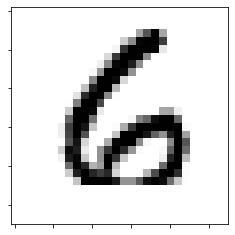

[Mode 8: {8: 1}] 


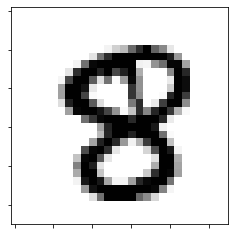

[Mode 8: {8: 1}] 


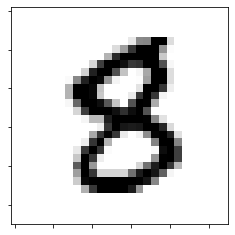

[Mode 8: {8: 1}] 


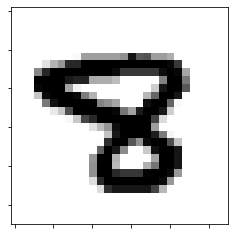

[Mode 9: {9: 1}] 


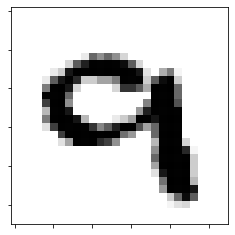

[Mode 4: {4: 1}] 


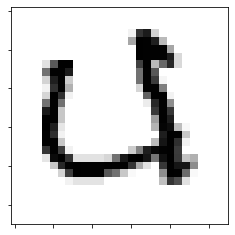

[Mode 0: {0: 1}] 


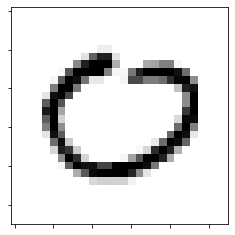

[Mode 2: {2: 1}] 


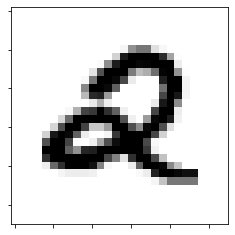

[Mode 4: {4: 1}] 


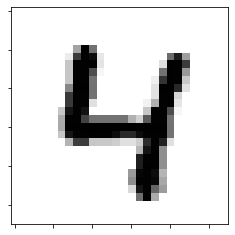

[Mode 8: {8: 1}] 


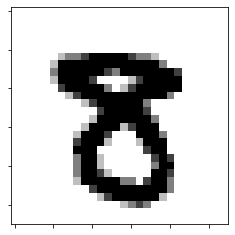

[Mode 5: {5: 1}] 


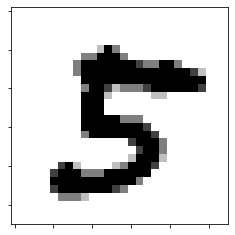

[Mode 8: {8: 1}] 


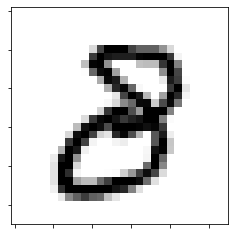

[Mode 2: {2: 1}] 


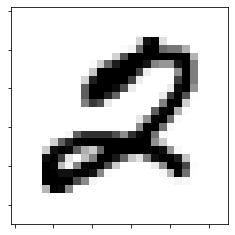

[Mode 9: {9: 1}] 


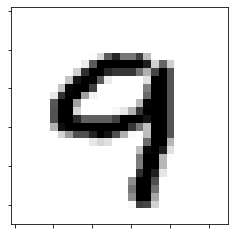

[Mode 3: {3: 1}] 


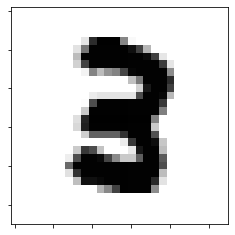

[Mode 9: {9: 1}] 


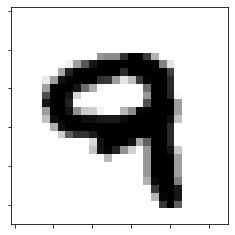

[Mode 5: {5: 1}] 


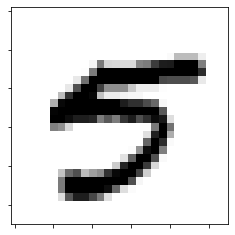

[Mode 2: {2: 1}] 


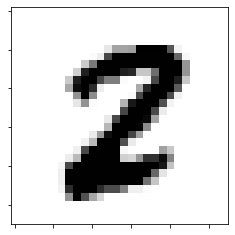

[Mode 4: {4: 1}] 


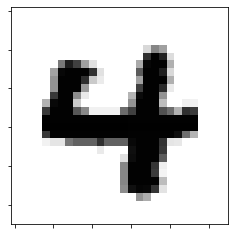

[Mode 4: {4: 1}] 


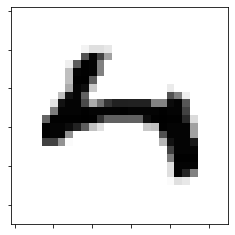

[Mode 3: {3: 1}] 


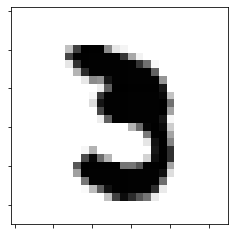

[Mode 5: {5: 1}] 


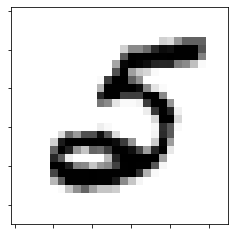

[Mode 3: {3: 1}] 


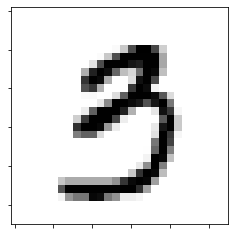

[Mode 4: {4: 1}] 


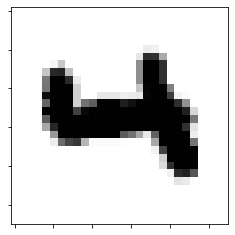

[Mode 9: {9: 1}] 


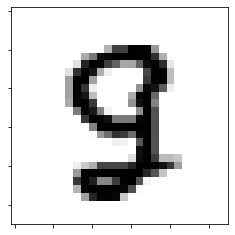

[Mode 8: {8: 1}] 


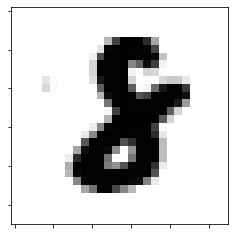

[Mode 2: {2: 1}] 


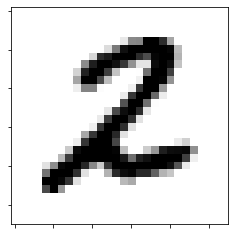

[Mode 3: {3: 1}] 


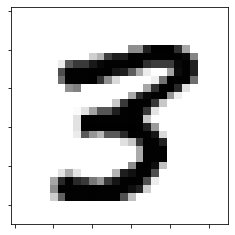

[Mode 3: {3: 1}] 


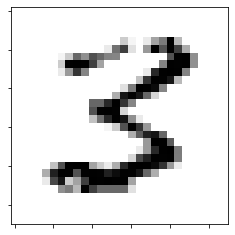

[Mode 8: {8: 1}] 


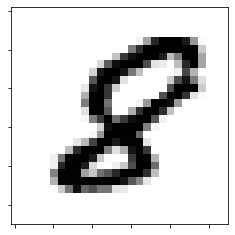

[Mode 4: {4: 1}] 


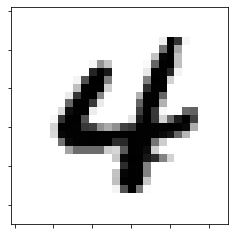

[Mode 7: {7: 1}] 


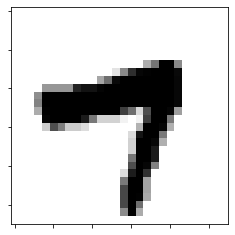

[Mode 8: {8: 1}] 


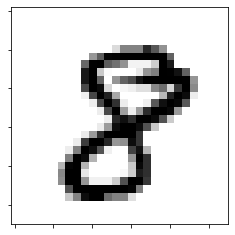

[Mode 9: {9: 1}] 


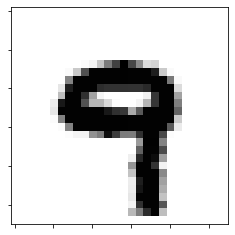

[Mode 9: {9: 1}] 


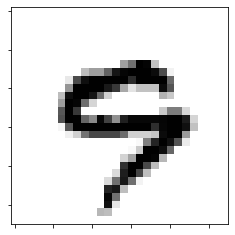

[Mode 8: {8: 1}] 


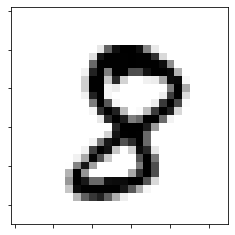

[Mode 5: {5: 1}] 


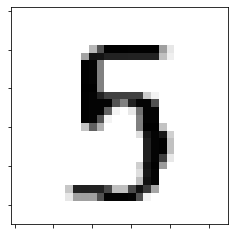

[Mode 3: {3: 1}] 


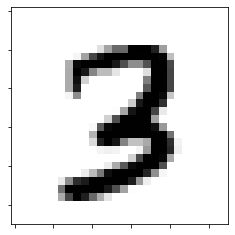

[Mode 2: {2: 1}] 


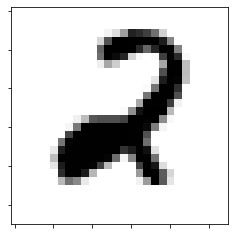

[Mode 5: {5: 1}] 


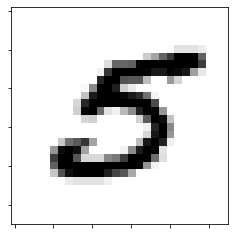

[Mode 3: {3: 1}] 


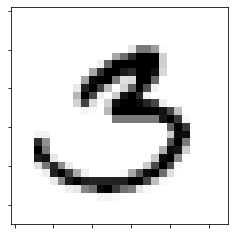

[Mode 8: {8: 1}] 


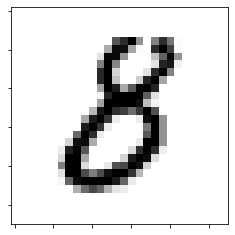

[Mode 9: {9: 1}] 


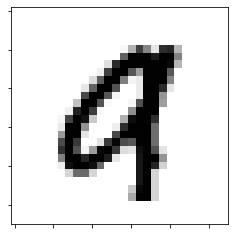

[Mode 5: {5: 1}] 


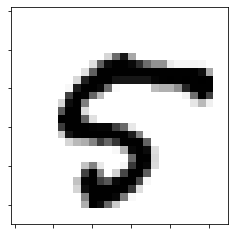

[Mode 4: {4: 1}] 


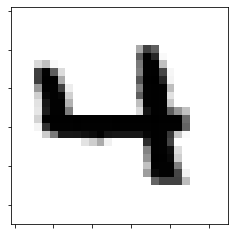

[Mode 3: {3: 1}] 


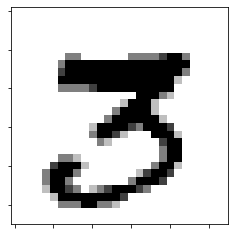

[Mode 3: {3: 1}] 


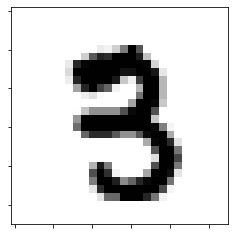

[Mode 8: {8: 1}] 


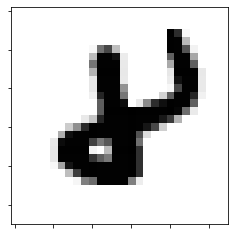

[Mode 5: {5: 1}] 


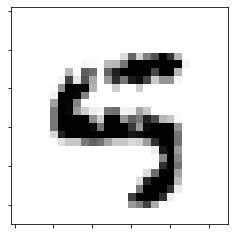

[Mode 8: {8: 1}] 


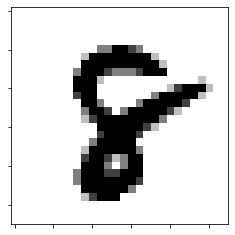

[Mode 6: {6: 1}] 


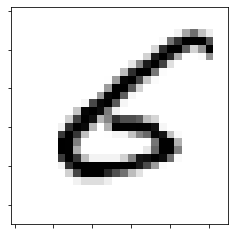

[Mode 8: {8: 1}] 


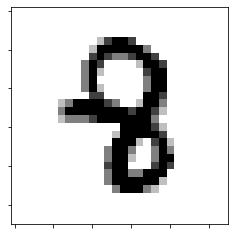

[Mode 4: {4: 1}] 


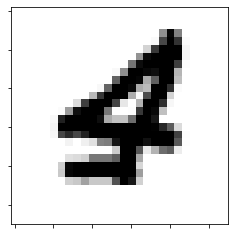

[Mode 7: {7: 1}] 


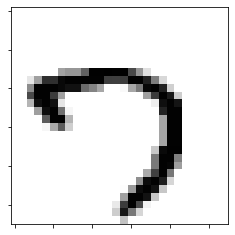

[Mode 5: {5: 1}] 


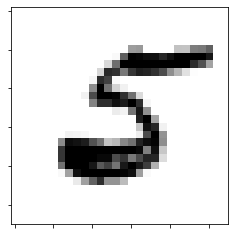

[Mode 2: {2: 1}] 


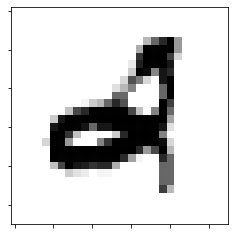

[Mode 9: {9: 1}] 


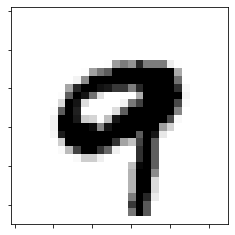

[Mode 8: {8: 1}] 


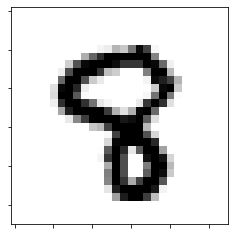

[Mode 4: {4: 1}] 


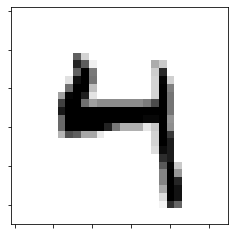

[Mode 8: {8: 1}] 


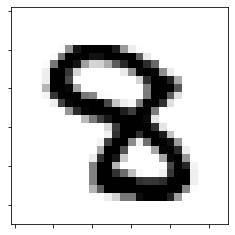

[Mode 4: {4: 1}] 


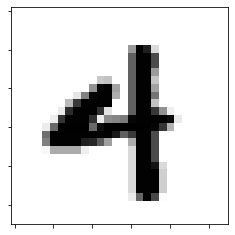

[Mode 3: {3: 1}] 


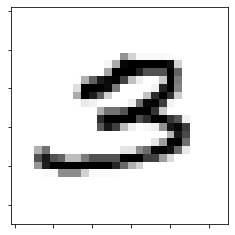

[Mode 8: {8: 1}] 


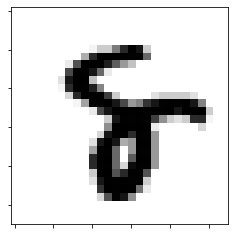

[Mode 2: {2: 1}] 


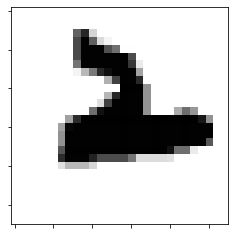

[Mode 0: {0: 1}] 


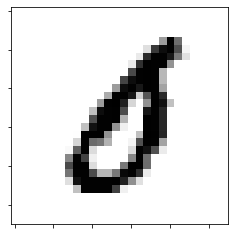

[Mode 3: {3: 1}] 


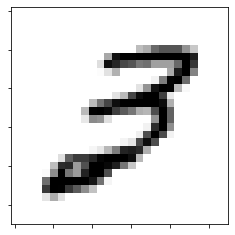

[Mode 8: {8: 1}] 


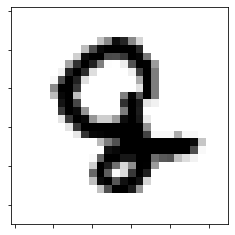

[Mode 4: {4: 1}] 


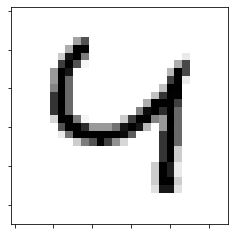

[Mode 4: {4: 1}] 


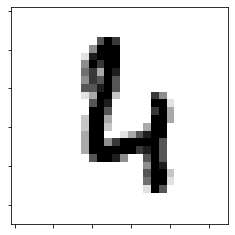

[Mode 2: {2: 1}] 


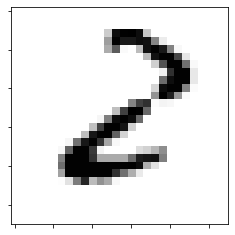

[Mode 9: {9: 1}] 


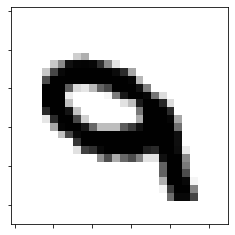

[Mode 5: {5: 1}] 


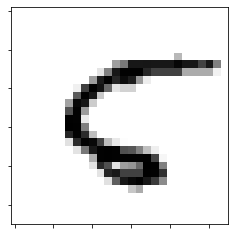

[Mode 2: {2: 1}] 


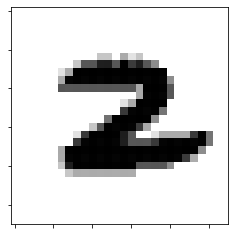

[Mode 7: {7: 1}] 


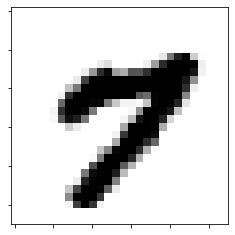

[Mode 5: {5: 1}] 


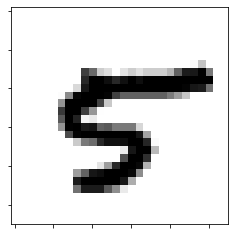

[Mode 8: {8: 1}] 


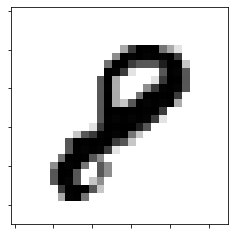

[Mode 2: {2: 1}] 


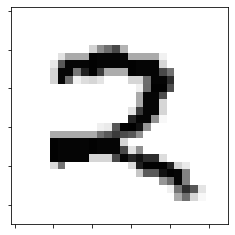

[Mode 9: {9: 1}] 


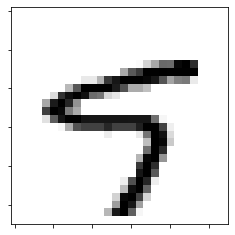

[Mode 3: {3: 1}] 


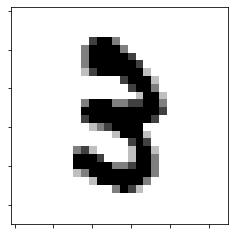

[Mode 7: {7: 1}] 


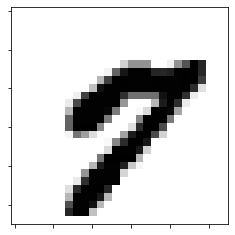

[Mode 7: {7: 1}] 


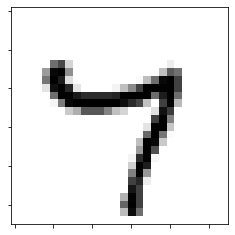

[Mode 7: {7: 1}] 


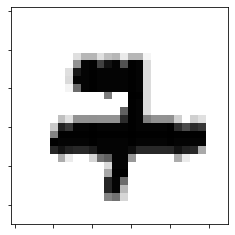

[Mode 2: {2: 1}] 


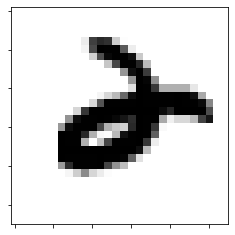

[Mode 3: {3: 1}] 


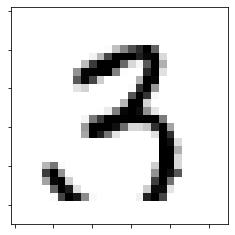

[Mode 4: {4: 1}] 


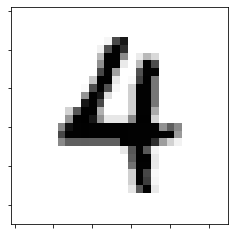

[Mode 8: {8: 1}] 


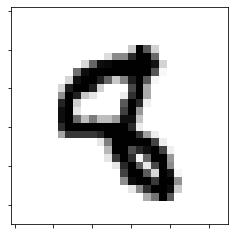

[Mode 2: {2: 1}] 


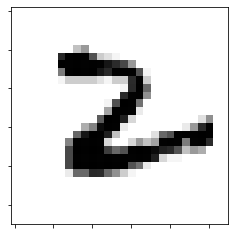

[Mode 2: {2: 1}] 


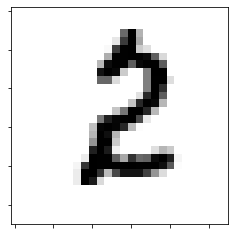

[Mode 9: {9: 1}] 


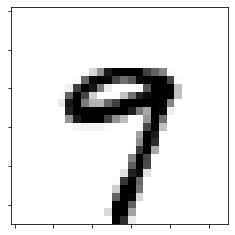

[Mode 8: {8: 1}] 


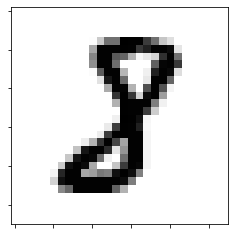

[Mode 2: {2: 1}] 


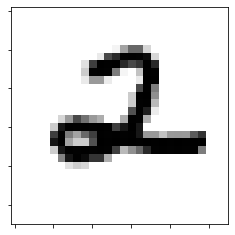

[Mode 2: {2: 1}] 


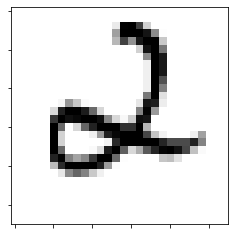

[Mode 5: {5: 1}] 


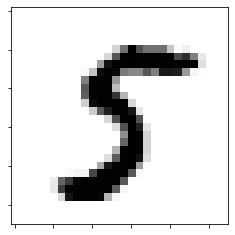

[Mode 8: {8: 1}] 


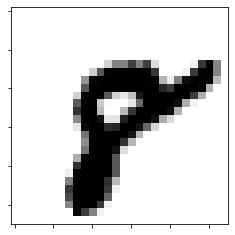

[Mode 8: {8: 1}] 


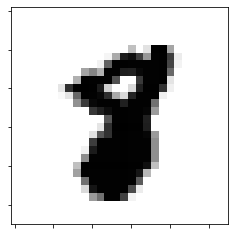

[Mode 8: {8: 1}] 


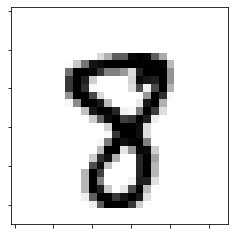

[Mode 2: {2: 1}] 


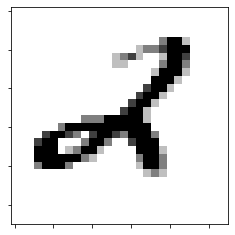

[Mode 3: {3: 1}] 


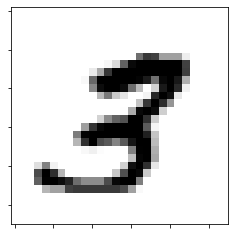

[Mode 5: {5: 1}] 


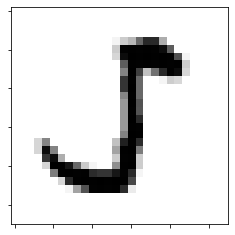

[Mode 0: {0: 1}] 


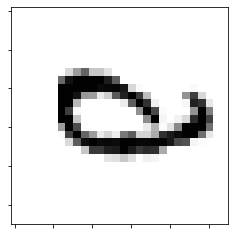

[Mode 8: {8: 1}] 


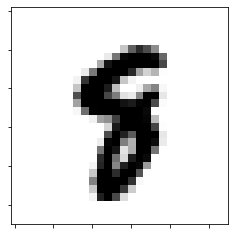

[Mode 4: {4: 1}] 


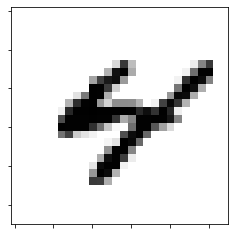

[Mode 3: {3: 1}] 


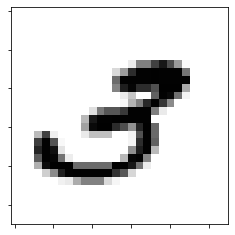

[Mode 5: {5: 1}] 


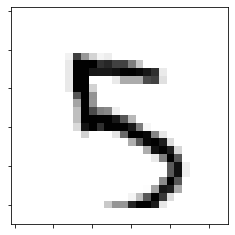

[Mode 1: {1: 1}] 


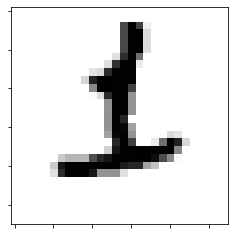

[Mode 1: {1: 1}] 


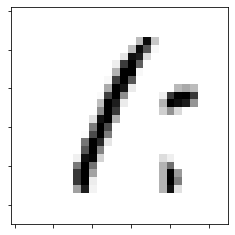

[Mode 3: {3: 1}] 


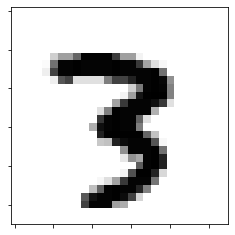

[Mode 7: {7: 1}] 


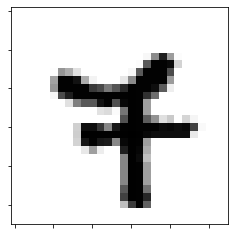

[Mode 2: {2: 1}] 


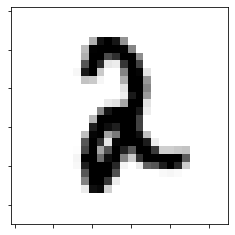

[Mode 3: {3: 1}] 


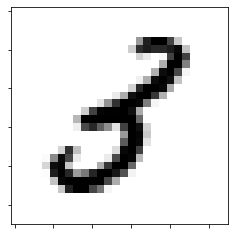

[Mode 8: {8: 1}] 


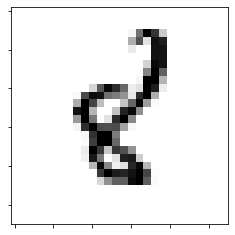

[Mode 7: {7: 1}] 


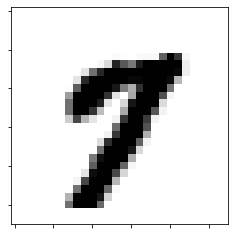

[Mode 4: {4: 1}] 


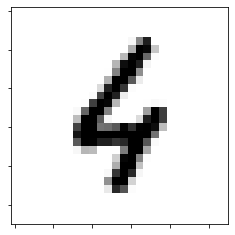

[Mode 4: {4: 1}] 


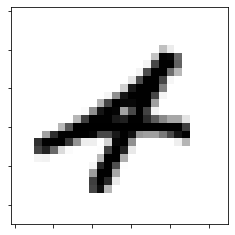

[Mode 2: {2: 1}] 


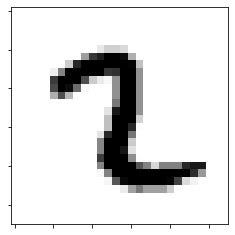

[Mode 2: {2: 1}] 


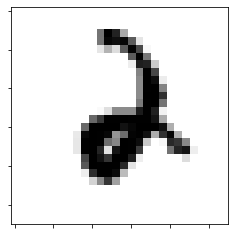

[Mode 6: {6: 1}] 


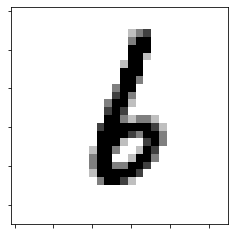

[Mode 8: {8: 1}] 


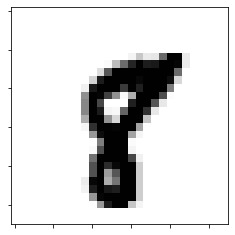

[Mode 5: {5: 1}] 


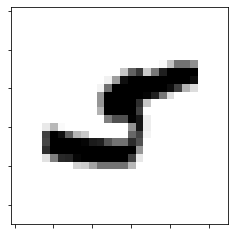

[Mode 7: {7: 1}] 


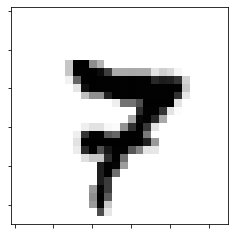

[Mode 8: {8: 1}] 


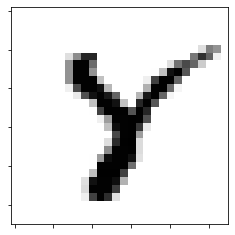

[Mode 7: {7: 1}] 


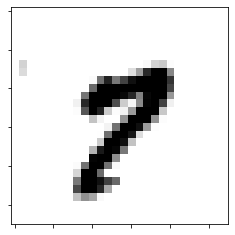

[Mode 2: {2: 1}] 


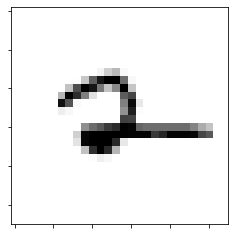

In [23]:
clusters_bad.plot_mean_digit()